初期解の総移動距離 = 213.16048777610845
近傍探索適用後の総移動距離 = 213.16048777610845


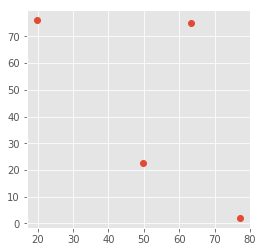

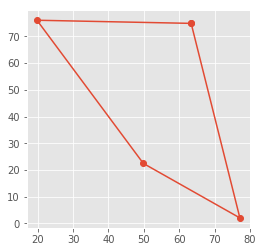

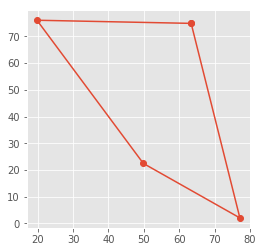

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

N = 4
MAP_SIZE = 100

np.random.seed(10)
city_xy = np.random.rand(N, 2) * MAP_SIZE
plt.figure(figsize=(4, 4))
plt.plot(city_xy[:, 0], city_xy[:, 1], 'o')

x = city_xy[:, 0]
y = city_xy[:, 1]
distance_matrix = np.sqrt((x[:, np.newaxis] - x[np.newaxis, :]) ** 2 +
                          (y[:, np.newaxis] - y[np.newaxis, :]) ** 2)

def calculate_total_distance(order, distance_matrix):
    """Calculate total distance traveled for given visit order"""
    idx_from = np.array(order)
    idx_to = np.array(order[1:] + [order[0]])
    distance_arr = distance_matrix[idx_from, idx_to]
    return np.sum(distance_arr)

#かしか
def visualize_visit_order(order, city_xy):
    """Visualize traveling path for given visit order"""
    route = np.array(order + [order[0]])  # add point of departure
    x_arr = city_xy[:, 0][route]
    y_arr = city_xy[:, 1][route]

    plt.figure(figsize=(4, 4))
    plt.plot(x_arr, y_arr, 'o-')

#改善しますか？ 
def calculate_2opt_exchange_cost(visit_order, i, j, distance_matrix):
    """Calculate the difference of cost by applying given 2-opt exchange"""
    n_cities = len(visit_order)
    a, b = visit_order[i], visit_order[(i + 1) % n_cities]
    c, d = visit_order[j], visit_order[(j + 1) % n_cities]

    cost_before = distance_matrix[a, b] + distance_matrix[c, d]
    cost_after = distance_matrix[a, c] + distance_matrix[b, d]
    return cost_after - cost_before

def apply_2opt_exchange(visit_order, i, j):
    """Apply 2-opt exhanging on visit order"""

    tmp = visit_order[i + 1: j + 1]
    tmp.reverse()
    visit_order[i + 1: j + 1] = tmp

    return visit_order

    
def improve_with_2opt(visit_order, distance_matrix):
    """Check all 2-opt neighbors and improve the visit order"""
    n_cities = len(visit_order)
    cost_diff_best = 0.0
    i_best, j_best = None, None

    for i in range(0, n_cities - 2):
        for j in range(i + 2, n_cities):
            if i == 0 and j == n_cities - 1:
                continue

            cost_diff = calculate_2opt_exchange_cost(
                visit_order, i, j, distance_matrix)

            if cost_diff < cost_diff_best:
                cost_diff_best = cost_diff
                i_best, j_best = i, j

    if cost_diff_best < 0.0:
        visit_order_new = apply_2opt_exchange(visit_order, i_best, j_best)
        return visit_order_new
    else:
        return None
    
def local_search(visit_order, distance_matrix, improve_func):
    """Main procedure of local search"""
    cost_total = calculate_total_distance(visit_order, distance_matrix)

    while True:
        improved = improve_func(visit_order, distance_matrix)
        if not improved:
            break

        visit_order = improved

    return visit_order

test_order = list(np.random.permutation(N))
visualize_visit_order(test_order, city_xy)
total_distance = calculate_total_distance(test_order, distance_matrix)
print('初期解の総移動距離 = {}'.format(total_distance))

# 近傍を計算
improved = local_search(test_order, distance_matrix, improve_with_2opt)
visualize_visit_order(improved, city_xy)
total_distance = calculate_total_distance(improved, distance_matrix)
print('近傍探索適用後の総移動距離 = {}'.format(total_distance))